# Top Movies by Number of Reviews, H1
In IMDb, everyone can give a review of a movie. This can include star rating, recommendation and a detailed review. I want to take a look at the most reviewed movies to see if I am familiar with them.

### Objective
* **Goal:** Sort out the six most reviewed movies.
* **Hypothesis 1:** Movies with a higher number of reviews are more popular, and therefor I have seen them.

#### Setup
To sort out and create an illustration of the top reviewed movies, I installed the Python libraries (answer to learning goal 2.4 in rubric):
* **Pandas**: For data manipultaion, gives me the opportuinity to create structures like DataFrame, filtering and grouping.
* **Matplotlib**: A plotting library to create visualizations like histograms, scatter plots, line plots etc.
* **Seaborn**: Create a more informative statistical graph

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame to access items in dataset
data_path = "../data/merged_dataset.csv"

df = pd.read_csv(data_path)

In [68]:

# Ensure that 'num_reviews' are numeric
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

# Drop rows with NaN values in either 'num_reviews' or 'num_raters'
df = df.dropna(subset=['num_reviews'])


#### First try
Created a bar chart with default settings. Used matplotlib.

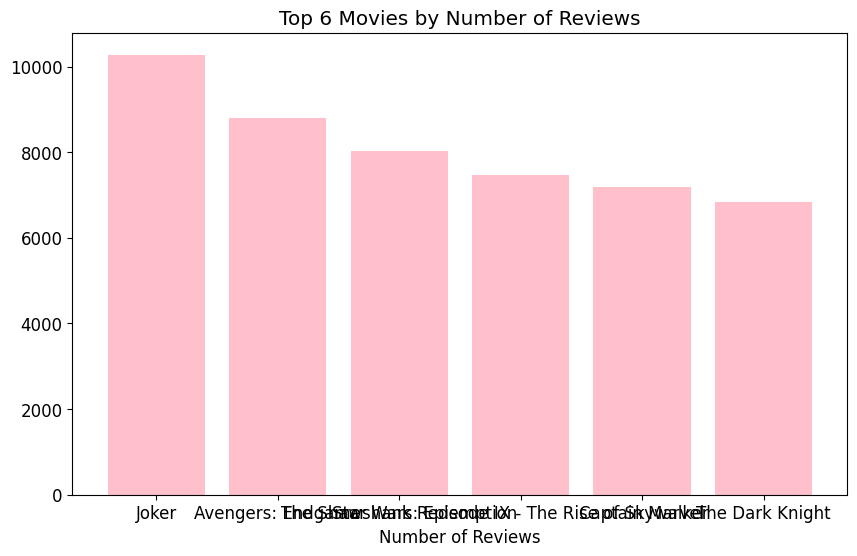

In [69]:
# Sort the movies by "num_reviews" in descending order and get the top 6
top_movies = df[["name", "num_reviews"]].sort_values(by="num_reviews", ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10,6)) #Create a bar chart
plt.bar(top_movies['name'], top_movies['num_reviews'], color='pink')
plt.title('Top 6 Movies by Number of Reviews')
plt.xlabel('Number of Reviews')

# Saving the plot to the Plots folder
plt.savefig('../plots/Top 6 movies by number of reviews plain.png')

# Show the plot
plt.show()

#### Second try
The first try, with the default settings created a "horrible" figure. the movie-names cross over each other, the text is not intuitive and the color is quite bright. 

Therefor I created an adjusted figure where the bars are horizontal, the colors differ between the movies, x and y is labeld. All of the text is in a font size making it easy to read. Overall this figure is more intuitive when it comes to which movie is most reviewed in a readable order.

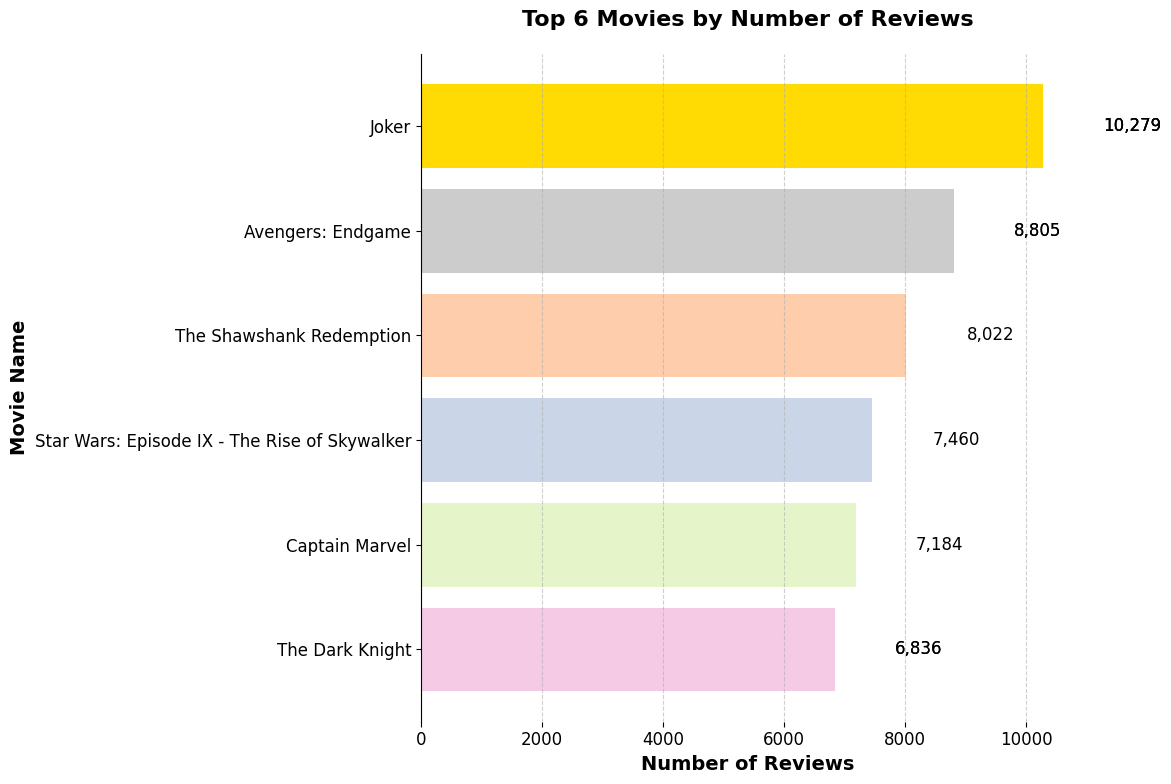

In [70]:
#Set the font size, make it easier to read
plt.rcParams.update({"font.size": 12})

# Custom color palette from seaborn, I want "easter" vibe
# Inspired by seaborn color palet "Pastel2"
colors = ["#CBD5E8", "#E6F5C9", "#FFDA03", "#F4CAE4", "#CCCCCC", "#FDCDAC"]

# Plotting
plt.figure(figsize=(12,8)) #bar chart
bars = plt.barh(top_movies['name'], top_movies['num_reviews'], color=colors)
plt.title('Top 6 Movies by Number of Reviews', fontsize=16, pad=20, fontweight= "bold")
plt.xlabel('Number of Reviews', fontsize=14, fontweight="bold")
plt.ylabel('Movie Name', fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()

# Adding data labels
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=12)

# Adding gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Adjust layout to prevent cropping
plt.tight_layout()

#removes top, right and bottom line
sns.despine(left=False, bottom=True)

# Save and show the plot
plt.savefig('../plots/Review_popularity.png')
plt.show()

### Conclusion
The six most reviewed movies is sorted and illustrated in the order: Joker, The Shawshank redemption, Star Wars episode IX - the rise of skywalker, Captain Marvel and The dark knight. 

My hypothesis was: Movies with a higher number of reviews are more popular, and therefor I have seen them.

This is partially correct. I have watched 2/3 of the movies. Joker is most popular by number of reviewers, I have seen this and liked it a lot! Further, one can go into IMDb and look at what people write about the movies. Further investigation of popularity is visualized in hypothesis XX.
